In [42]:
# thermal stability 
# fits to logistic equation 

In [43]:
import pandas 
import numpy as np 
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit 

In [44]:
# logistic equation 
def f(x, x0, k): 
    return 1/(1+np.exp(-k*(x-x0)))

# what we will be determining 
my_index = ['tm', 'k', 'err_tm', 'err_k' ]

In [45]:
def determine_tm( df ):
    mean_highest_rates = df[ df.rate > df.rate.quantile(.9) ].rate.mean()  
    df.rate = df.rate / mean_highest_rates
    df.dropna( inplace=True ) 
    
    reg = LinearRegression()
    reg.fit( df.temp.reshape(-1, 1), df.rate )
    slope = reg.coef_[0]
    
    try:
        popt, pcov = curve_fit( f, df.temp, df.rate, p0=( df.temp.mean(), slope ) )
        perr = np.sqrt( np.diag( pcov ) ) 
        if 20 < popt[0] < 60 and popt[1] < 0 and perr[0] < 1: 
            return pandas.Series( np.concatenate( [ popt, perr ] ), index=my_index ) 
        else:
            raise Exception( 'Outside of biological assay limits' ) 
    except Exception as e:
        return pandas.Series( np.zeros( 4 ), index=my_index )

In [55]:
# apply the function to the data set 
thermal = pandas.read_csv( 'clean/thermal.csv' )
my_estimates = pandas.DataFrame(columns=my_index)
for name, df in thermal.groupby( by='mutant' ):
    if name in my_estimates.index:
        name = '{}_duplicate'.format( name ) 
    try:
        my_estimates.loc[ name ] = determine_tm( df ) 
    except: 
        my_estimates.loc[ name ] = np.zeros( 4 ) 
    
print( my_estimates ) 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/bin/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


                tm         k    err_tm     err_k
A195S    39.239899 -1.288428  0.294457  0.456063
BglB     39.925911 -1.194772  0.093556  0.078470
C167A    39.835084 -1.466082  0.538300  0.579880
C167Q    38.858263 -0.652758  0.120535  0.046481
D403A     0.000000  0.000000  0.000000  0.000000
E154D    38.830607 -0.772457  0.316479  0.180952
E164A     0.000000  0.000000  0.000000  0.000000
E164G     0.000000  0.000000  0.000000  0.000000
E164R     0.000000  0.000000  0.000000  0.000000
E177A    37.538068 -0.524231  0.244081  0.058975
E180K    36.727463 -0.697838  0.249455  0.104092
E180L    39.596307 -0.756627  0.416541  0.200289
E222A    36.858445 -0.692307  0.122882  0.050041
E222H    34.906269 -0.699654  0.154036  0.065604
E222K    38.973138 -0.586357  0.442589  0.135271
E222K_2   0.000000  0.000000  0.000000  0.000000
E222Q    39.752715 -1.091719  0.283464  0.225091
E222R    39.099039 -0.856271  0.207859  0.144260
E222R_2   0.000000  0.000000  0.000000  0.000000
E222Y    37.128573 -

In [50]:
%matplotlib inline 
import matplotlib.pyplot as plt 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


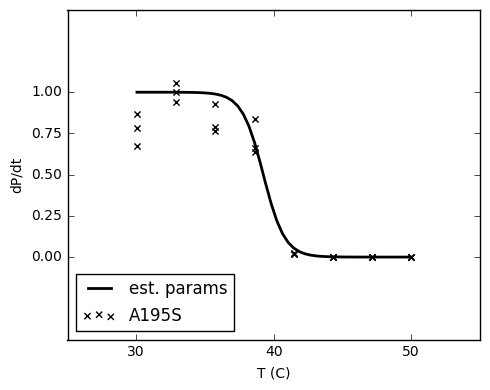

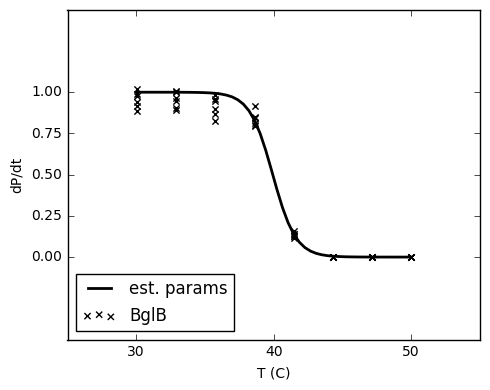

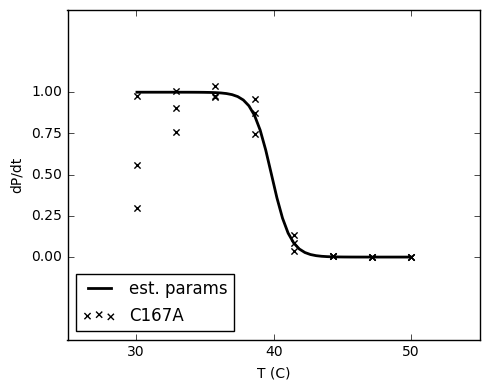

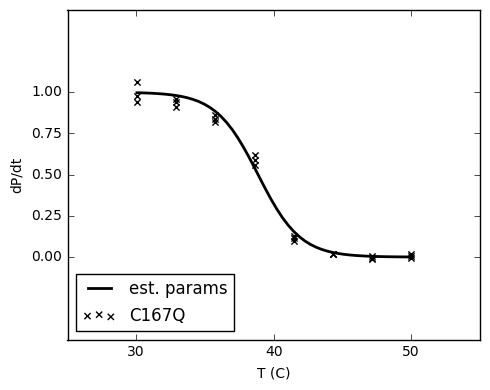

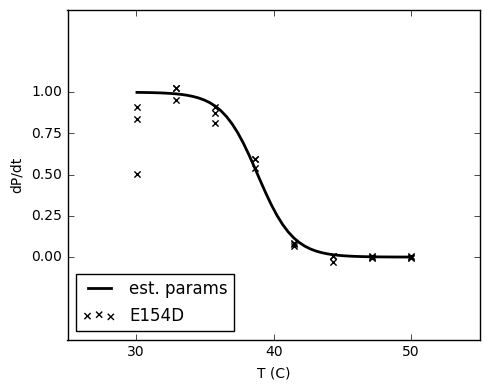

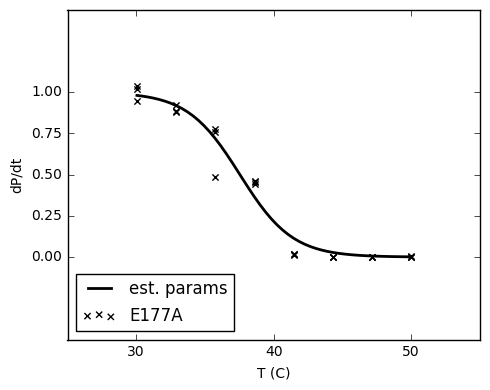

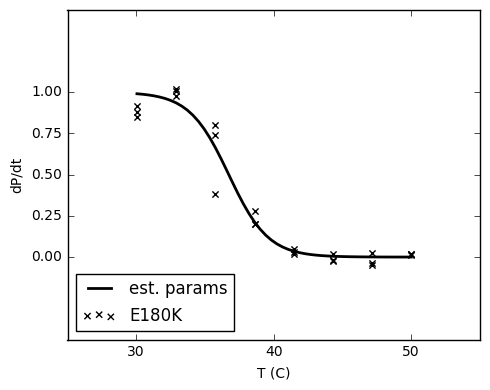

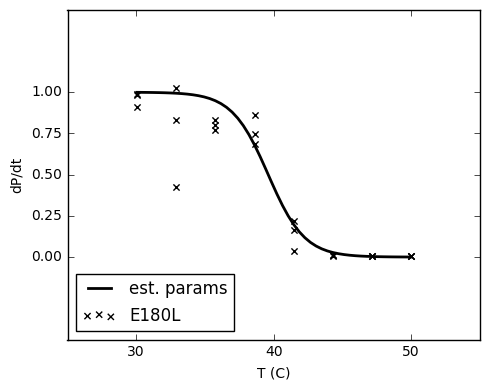

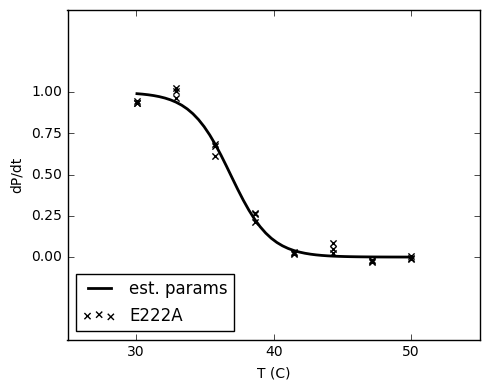

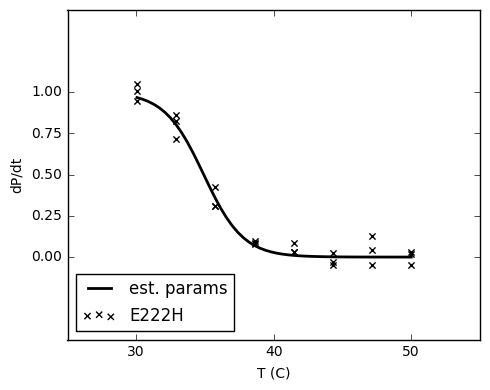

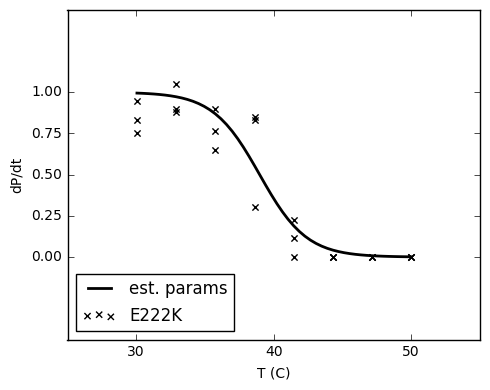

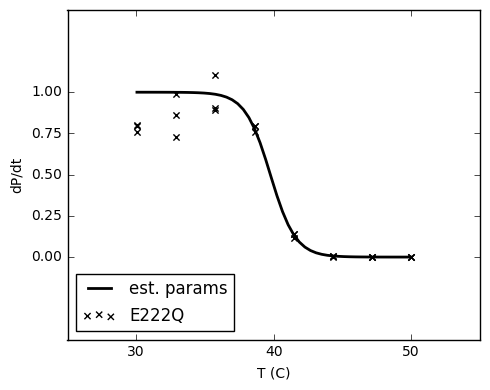

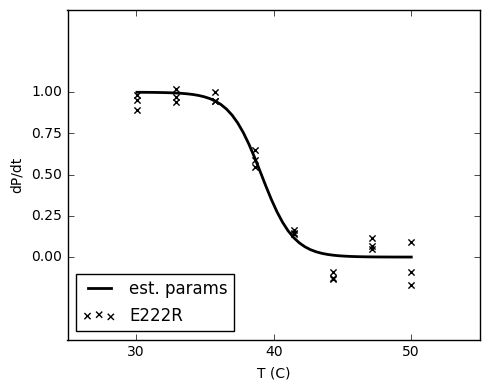

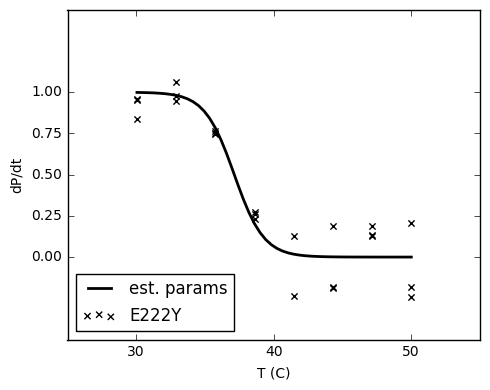

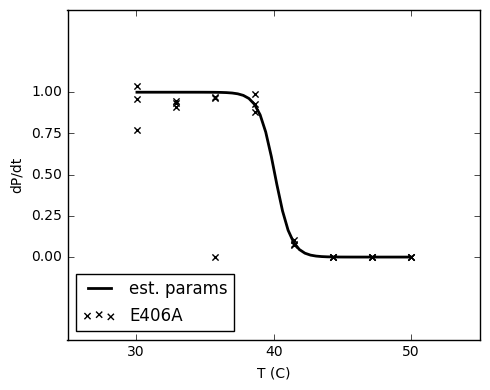

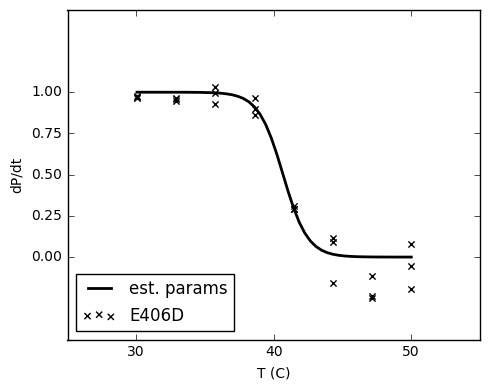

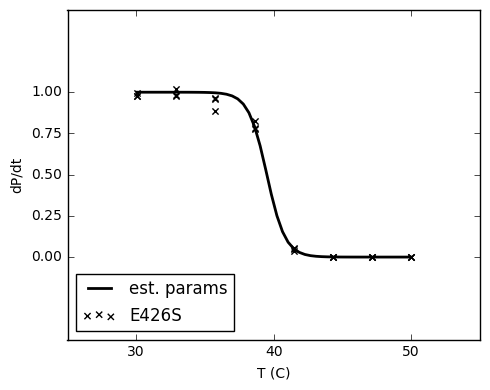

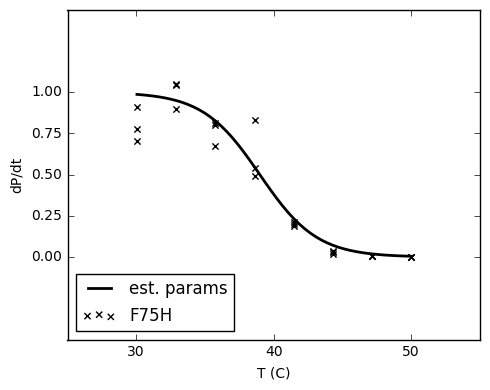

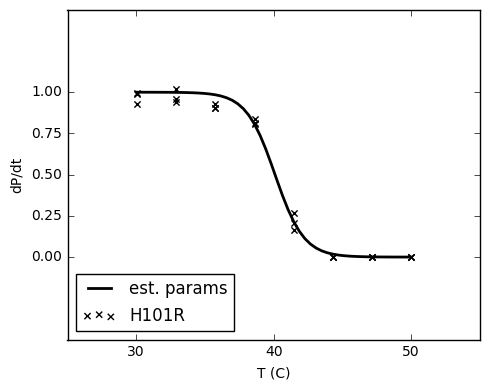

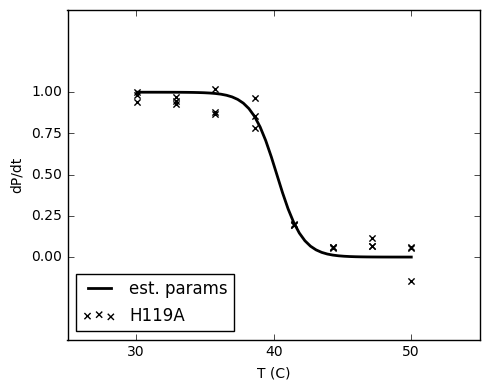

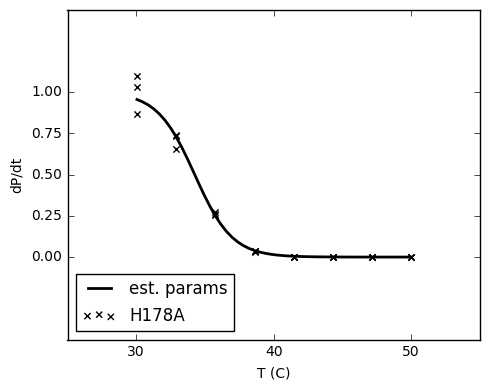

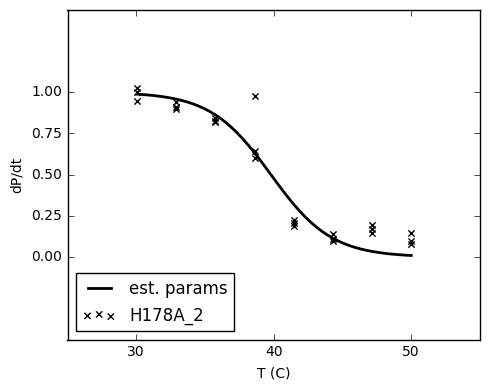

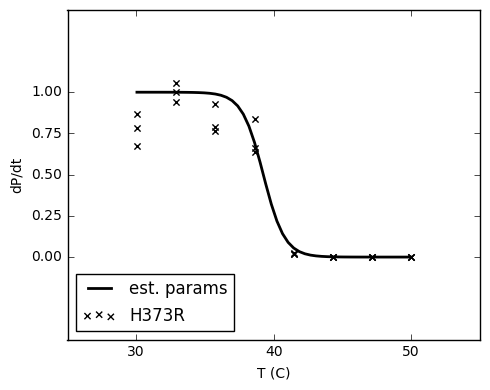

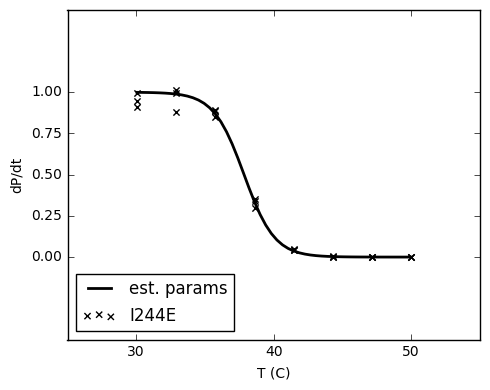

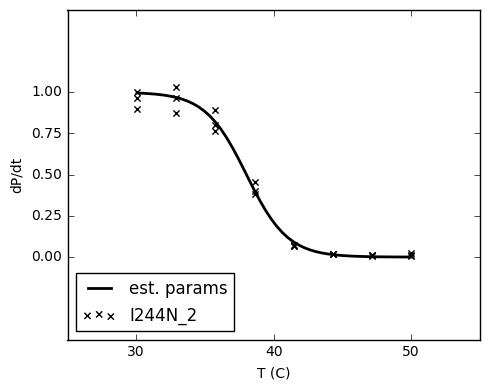

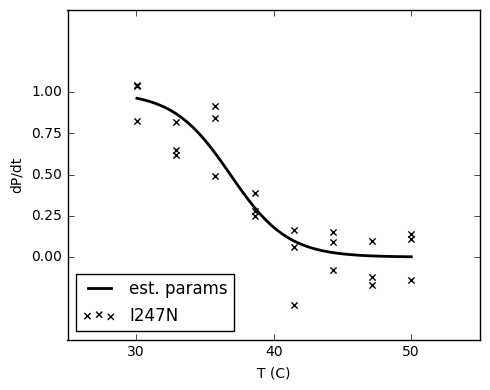

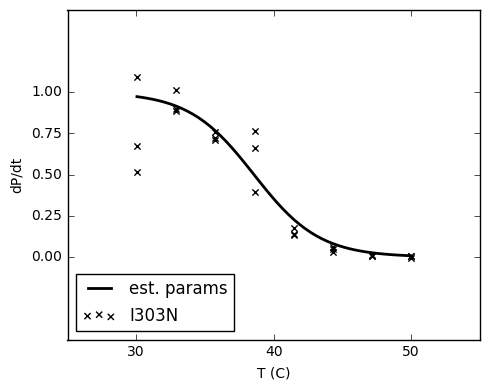

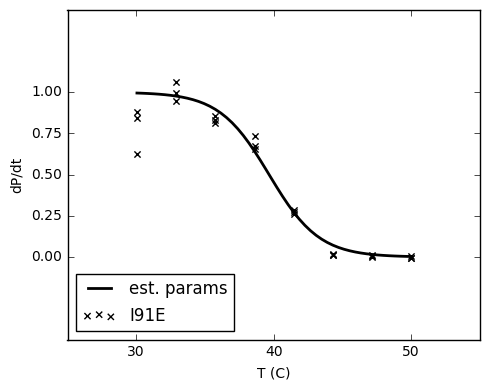

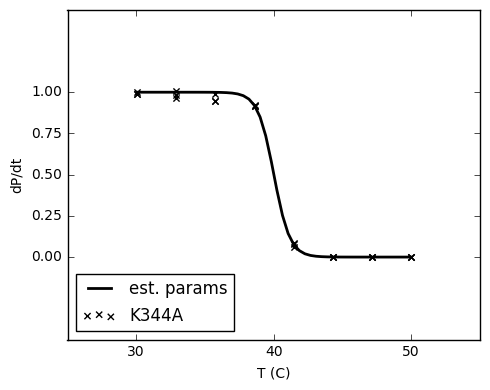

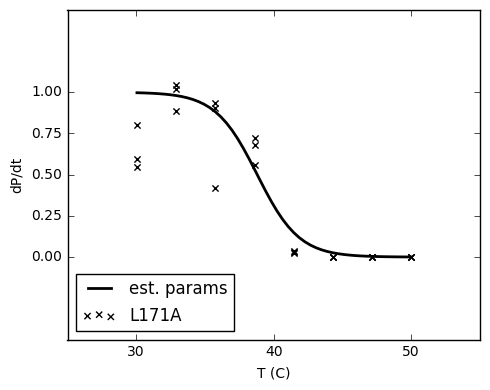

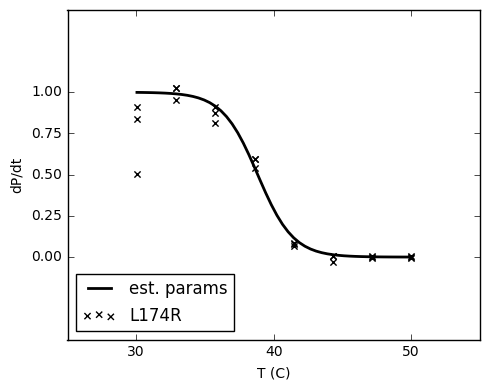

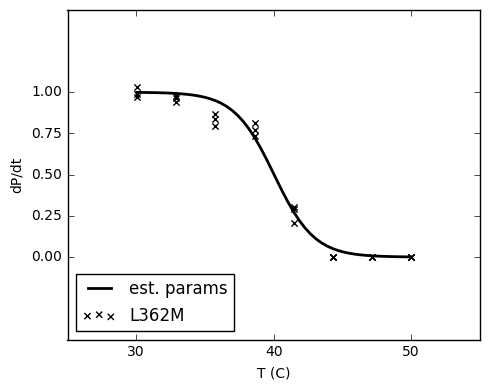

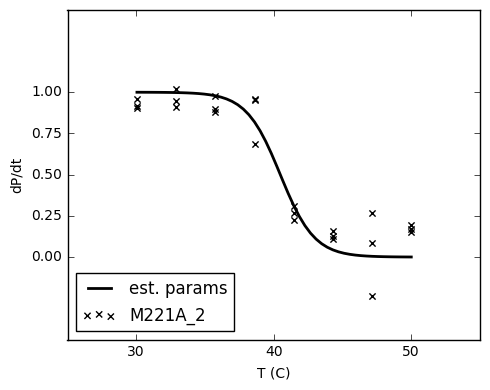

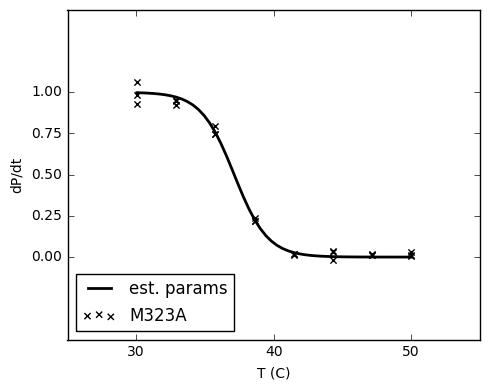

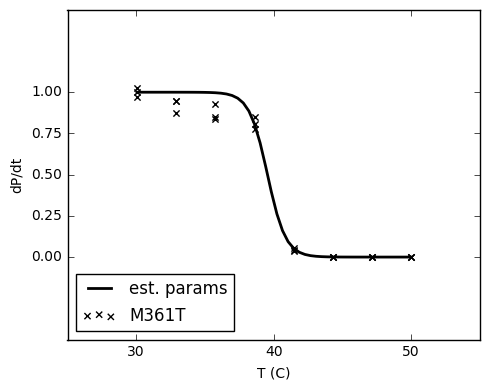

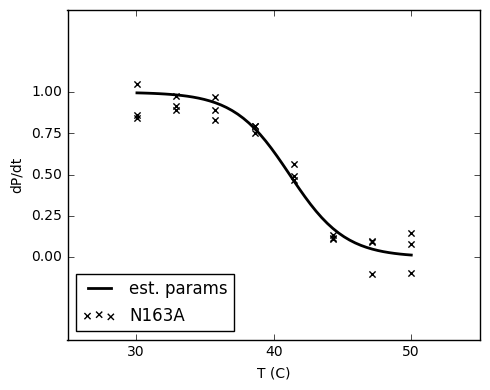

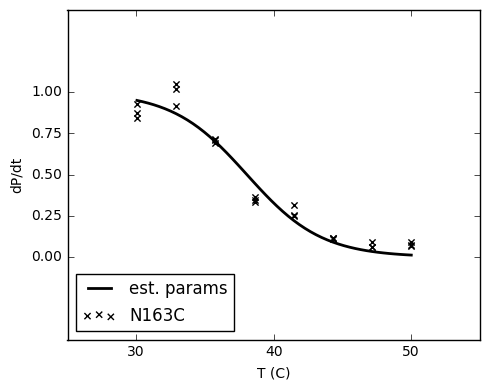

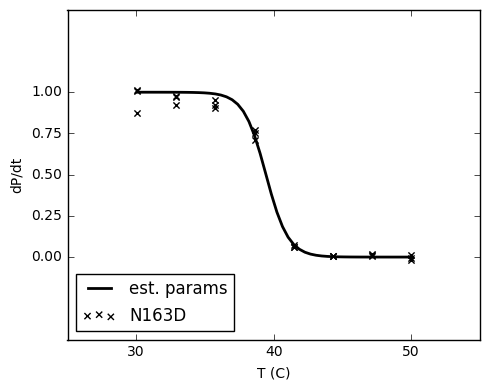

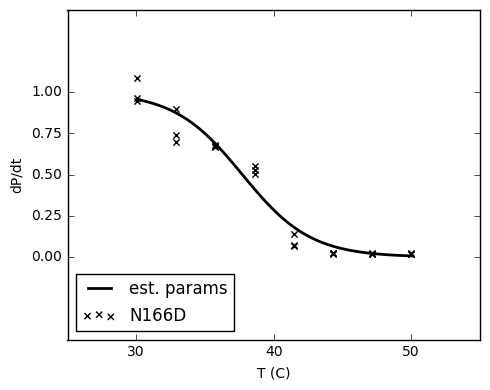

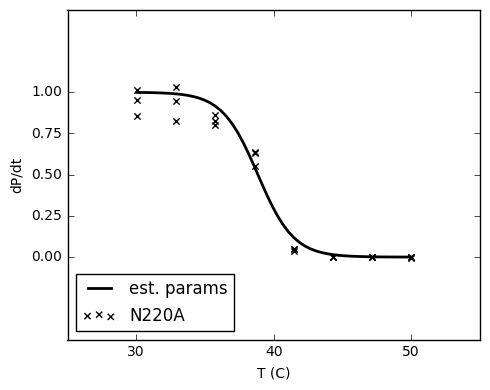

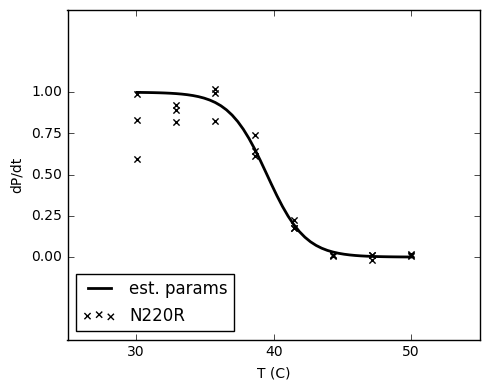

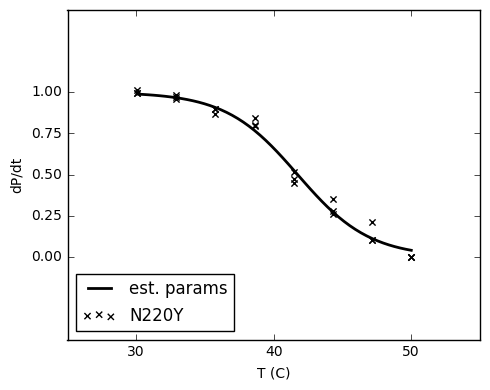

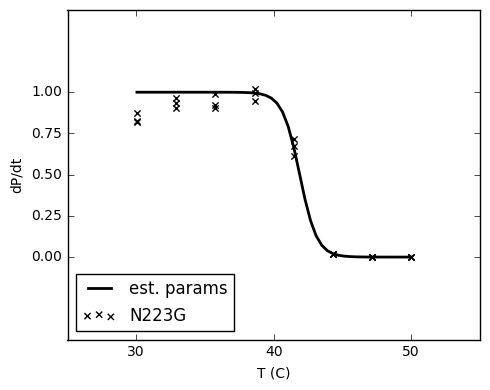

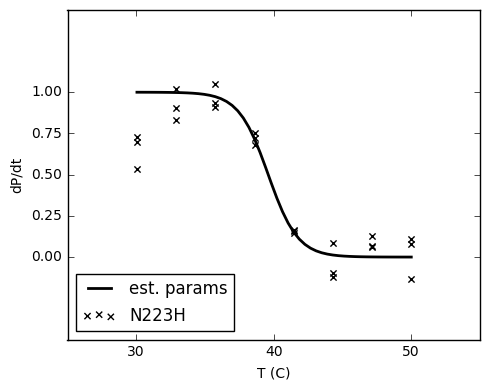

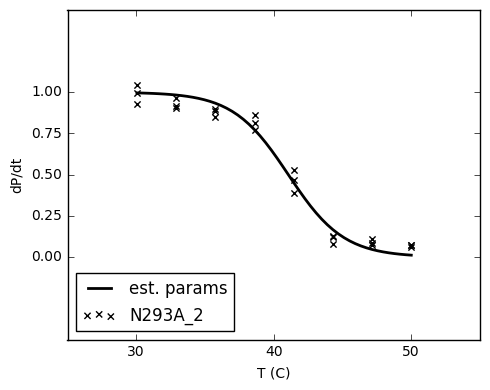

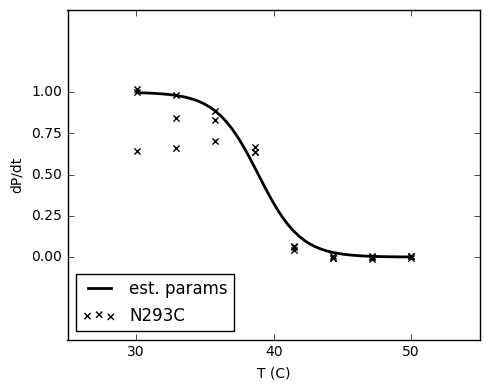

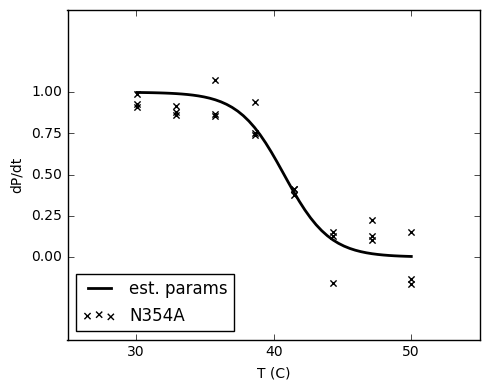

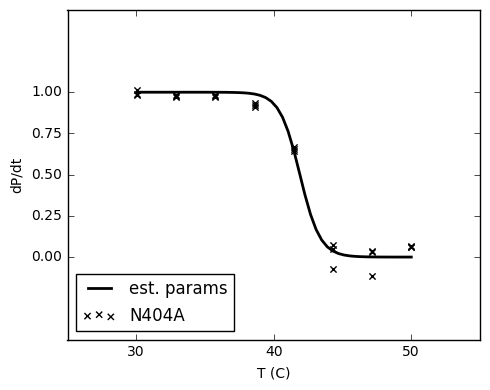

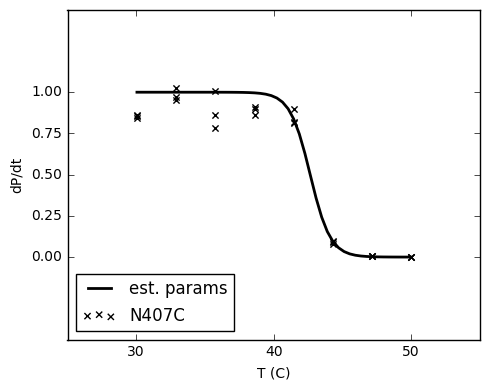

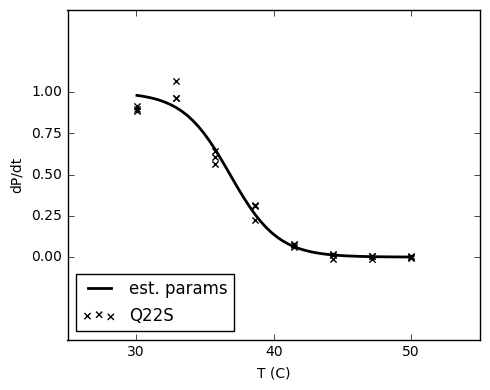

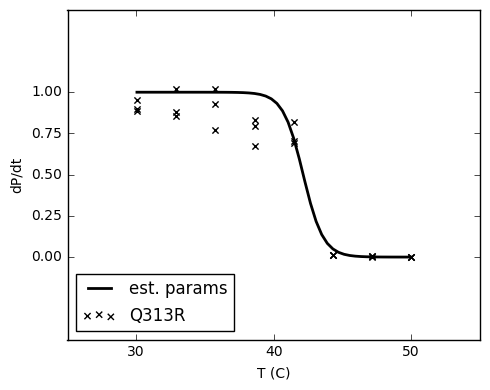

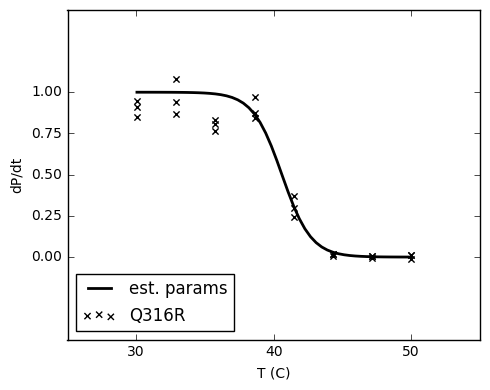

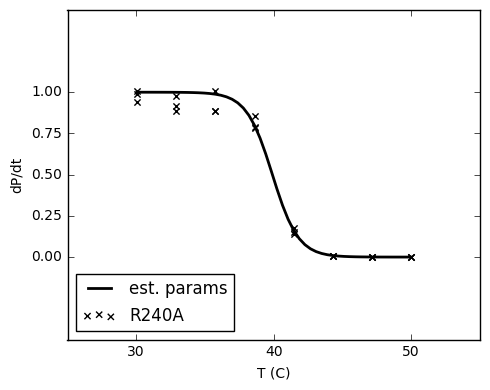

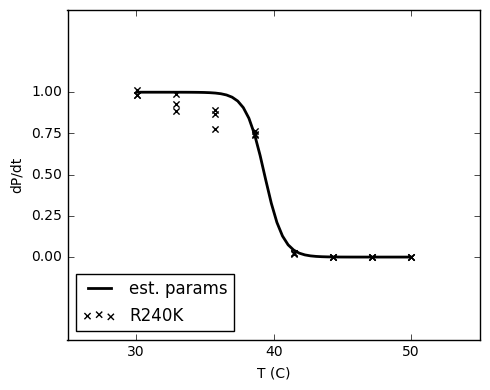

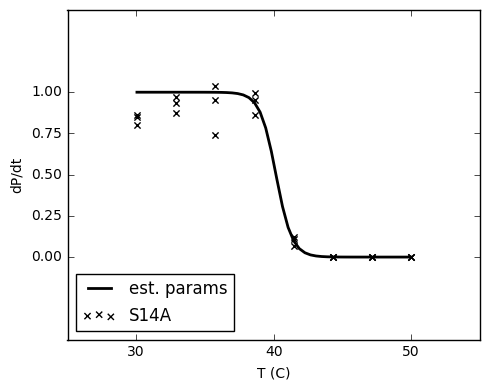

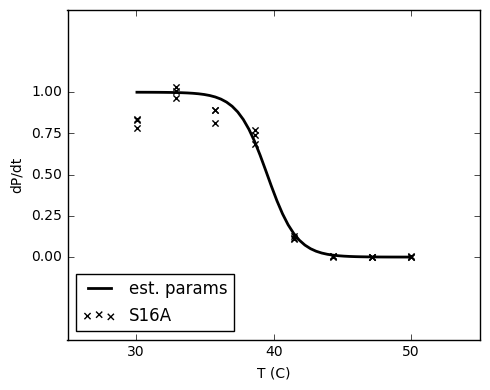

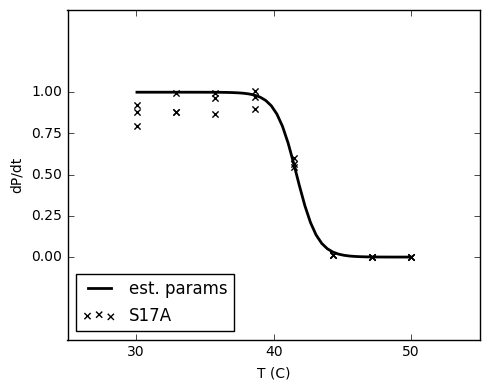

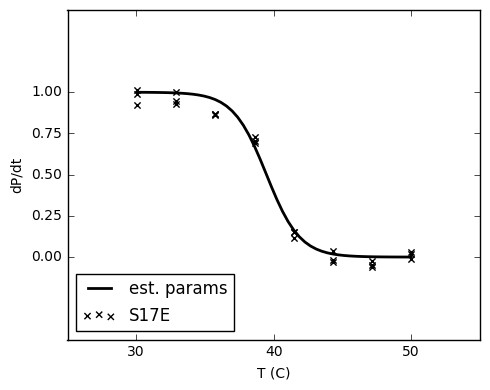

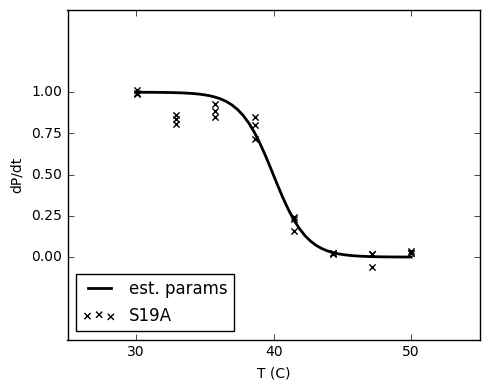

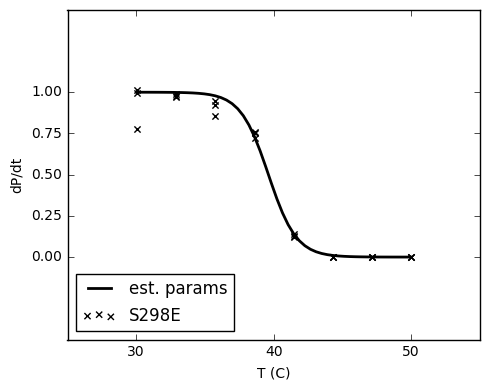

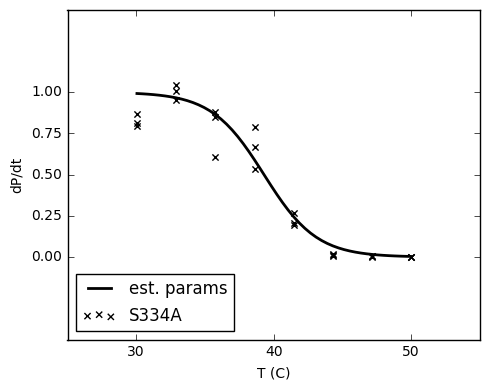

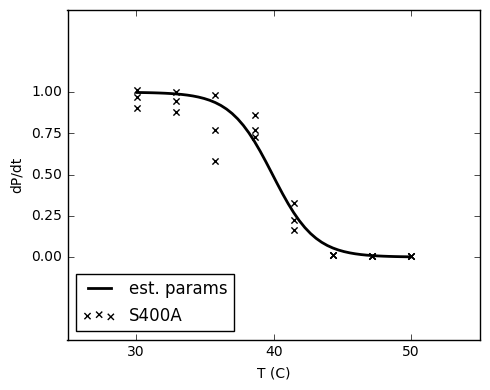

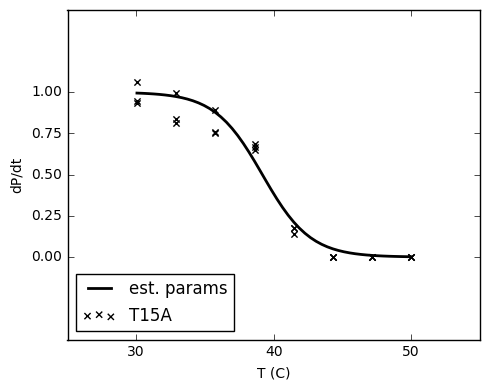

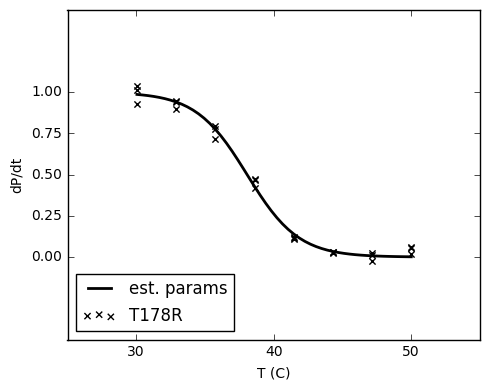

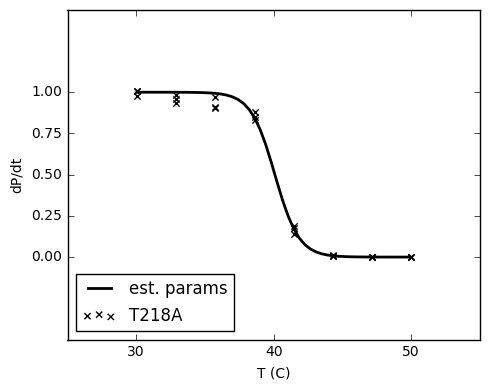

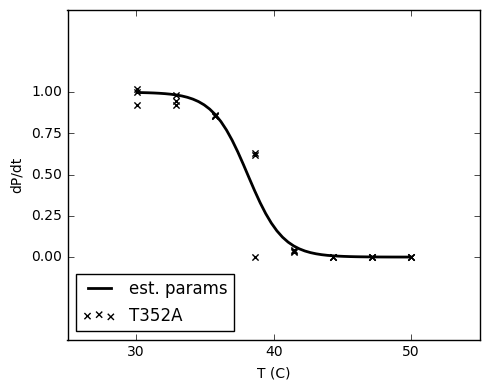

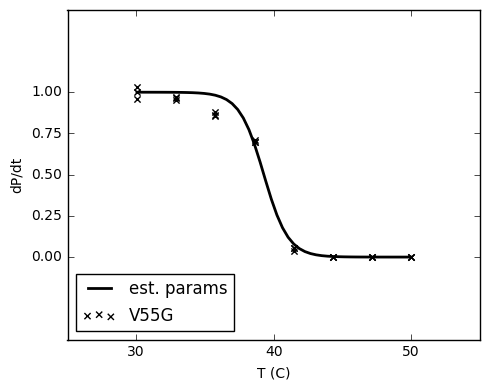

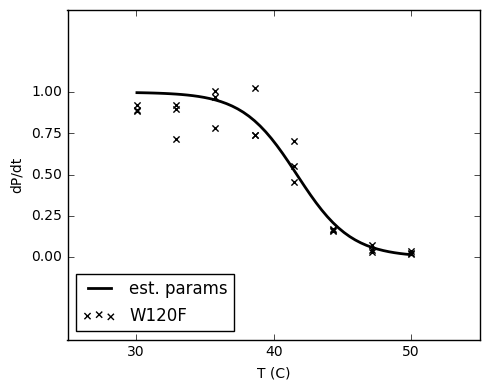

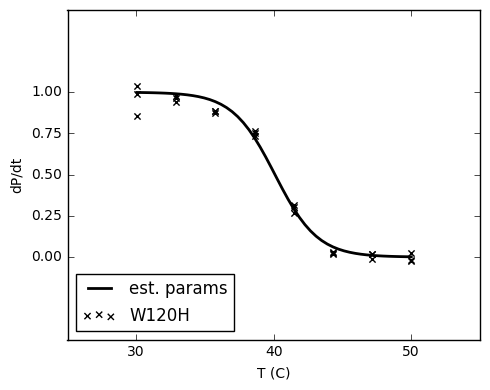

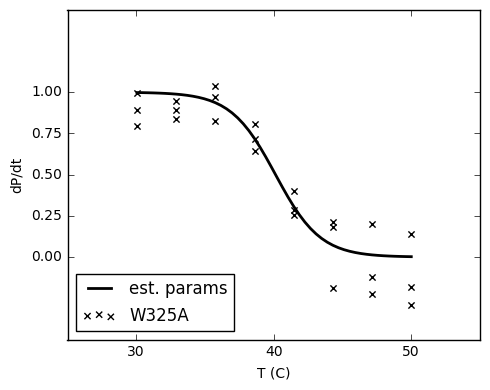

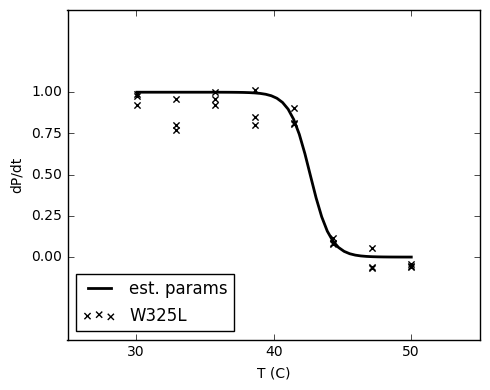

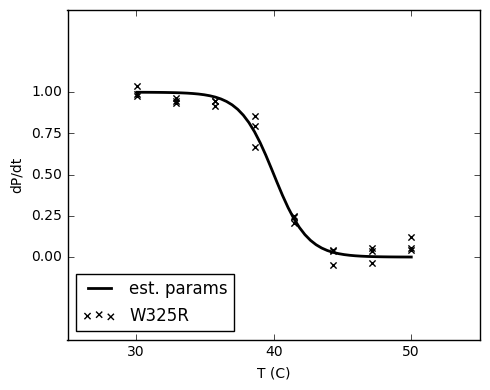

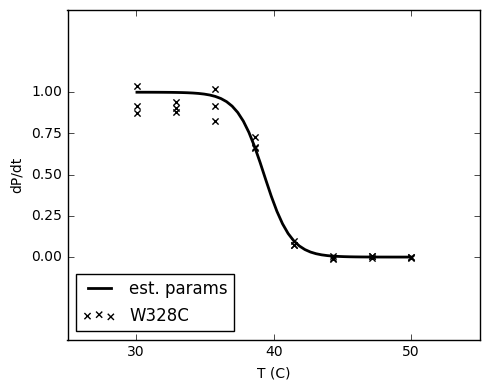

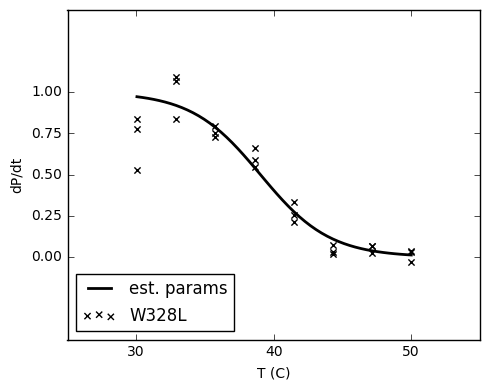

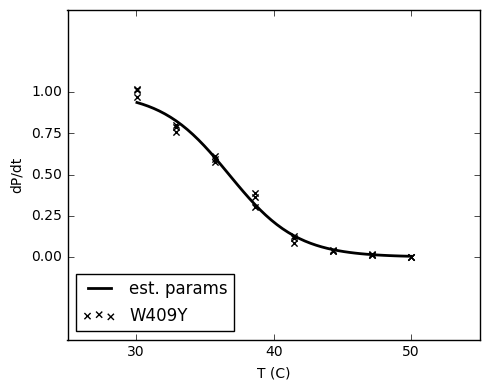

KeyError: 'the label [Y166P] is not in the [index]'

In [54]:
# make plots based on statistical analysis 

for name, df in thermal.groupby( by='mutant' ):
    
    if my_estimates.loc[ name ][ 'tm' ] > 0:
        

        mean_highest_rates = df[ df.rate > df.rate.quantile(.9) ].rate.mean()  
        df.rate = df.rate / mean_highest_rates

        plt.figure( figsize=(5,4) )
        plt.scatter( df.temp, df.rate, color='k', marker='x', label=name )
        x = np.linspace( df.temp.min(), df.temp.max(), 50 )
        my_params = my_estimates.loc[ name ]
        plt.plot( x, f( x, *my_params[0:2] ), color='k', label='est. params', lw=2 )
#         plt.plot( x, f( x, 40.24, -1.45 ), color='g', label='native BglB' )

    #         plt.fill_between( 
    #             x, 
    #             f( x, my_params[0]-my_params[2], my_params[1] ), 
    #             f( x, my_params[0]+my_params[2], my_params[1] ), 
    #             lw=0,
    #             color='lightblue',
    #             alpha=0.5,
    #         )

        plt.xlabel( 'T (C)' )
        plt.ylabel( 'dP/dt')
        plt.xticks( [ 30, 40, 50 ] )
        plt.yticks( [ 0, 0.25, .5, 0.75, 1 ] )
        plt.xlim( 25, 55 ) 
        plt.ylim( -0.5, 1.5 ) 
        plt.legend( loc='lower left' )
        plt.tight_layout()
        #plt.savefig( 'plots/%s.pdf' % index, format='pdf' )
        plt.show()